## Business Problem

## Importing the Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import warnings 
warnings.filterwarnings('ignore')
import pandas_profiling
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix,roc_curve,auc,plot_roc_curve
plt.style.use('ggplot')
#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Moudles related to feature selection
from sklearn.feature_selection import RFE,SelectKBest,f_classif

## Create UDFs

In [2]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

## Importing the Data

In [3]:
df = pd.read_csv('E:/DataTrained/Intership_Flip Robo/final_projects/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Data Inspection

In [5]:
# data informatiion
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 614 entries, 0 to 613

Data columns (total 13 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   Loan_ID            614 non-null    object 

 1   Gender             601 non-null    object 

 2   Married            611 non-null    object 

 3   Dependents         599 non-null    object 

 4   Education          614 non-null    object 

 5   Self_Employed      582 non-null    object 

 6   ApplicantIncome    614 non-null    int64  

 7   CoapplicantIncome  614 non-null    float64

 8   LoanAmount         592 non-null    float64

 9   Loan_Amount_Term   600 non-null    float64

 10  Credit_History     564 non-null    float64

 11  Property_Area      614 non-null    object 

 12  Loan_Status        614 non-null    object 

dtypes: float64(4), int64(1), object(8)

memory usage: 62.5+ KB


In [6]:
# convert Loan_amount_term and Credit_hostoryto categorical
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('object')
df['Credit_History']=df['Credit_History'].astype('object')

##### There are 3 datatypes;  9 objects , 3 float64 and 1 int 64 features.

In [7]:
# shape 
df.shape

(614, 13)

##### Dataset has 614 rows and 13 columns

In [8]:
# Check null values in  data
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### There are outliers in some features.

In [9]:
# Value counts for every feature to check the missing again or unique values
for i in df.columns:
    print(df[i].value_counts())
    print('**********************************')

LP001002    1

LP002328    1

LP002305    1

LP002308    1

LP002314    1

           ..

LP001692    1

LP001693    1

LP001698    1

LP001699    1

LP002990    1

Name: Loan_ID, Length: 614, dtype: int64

**********************************

Male      489

Female    112

Name: Gender, dtype: int64

**********************************

Yes    398

No     213

Name: Married, dtype: int64

**********************************

0     345

1     102

2     101

3+     51

Name: Dependents, dtype: int64

**********************************

Graduate        480

Not Graduate    134

Name: Education, dtype: int64

**********************************

No     500

Yes     82

Name: Self_Employed, dtype: int64

**********************************

2500    9

4583    6

6000    6

2600    6

3333    5

       ..

3244    1

4408    1

3917    1

3992    1

7583    1

Name: ApplicantIncome, Length: 505, dtype: int64

**********************************

0.0       273

2500.0      5

2083.0      5

1666.0

In [10]:
# drop Loan_ID as it is unique with high cardinality feature.
df.drop('Loan_ID',axis=1,inplace=True)

In [11]:
# Check imbalance of the target data
df.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

##### We have some low balanced data.

In [12]:
# split train data to continous and categorical varaiables.
num=df.select_dtypes(include=['float64','int64'])
cat=df.select_dtypes(include=['object'])

In [13]:
# Descriptive analysis for continous data
num.apply(continuous_var_summary)

,ApplicantIncome,CoapplicantIncome,LoanAmount
N,6.140000e+02,6.140000e+02,592.000000
NMISS,0.000000e+00,0.000000e+00,22.000000
SUM,3.317724e+06,9.954449e+05,86676.000000
MEAN,5.403459e+03,1.621246e+03,146.412162
MEDIAN,3.812500e+03,1.188500e+03,128.000000
STD,6.109042e+03,2.926248e+03,85.587325
VAR,3.732039e+07,8.562930e+06,7325.190241
MIN,1.500000e+02,0.000000e+00,9.000000
P1,1.025000e+03,0.000000e+00,30.000000
P5,1.897550e+03,0.000000e+00,56.000000


In [14]:
# Descriptive analysis for categorical data
cat.describe(include='O')

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,600.0,564.0,614,614
unique,2,2,4,2,2,10.0,2.0,3,2
top,Male,Yes,0,Graduate,No,360.0,1.0,Semiurban,Y
freq,489,398,345,480,500,512.0,475.0,233,422


In [15]:
# Missing values treatment for categprical variables
for col in cat.columns.difference(['Education','Property_Area','Loan_Status']):
    df[col]=df[col].fillna(df[col].mode()[0])

In [16]:
# Missing values treatment for Numerical with median as this feature is skewed so median will be beter than mean
df['LoanAmount']=df['LoanAmount'].fillna(df["LoanAmount"].median())

In [17]:
# check the missing values
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
# shoaw df
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## EDA

#### --Univariate analysis--

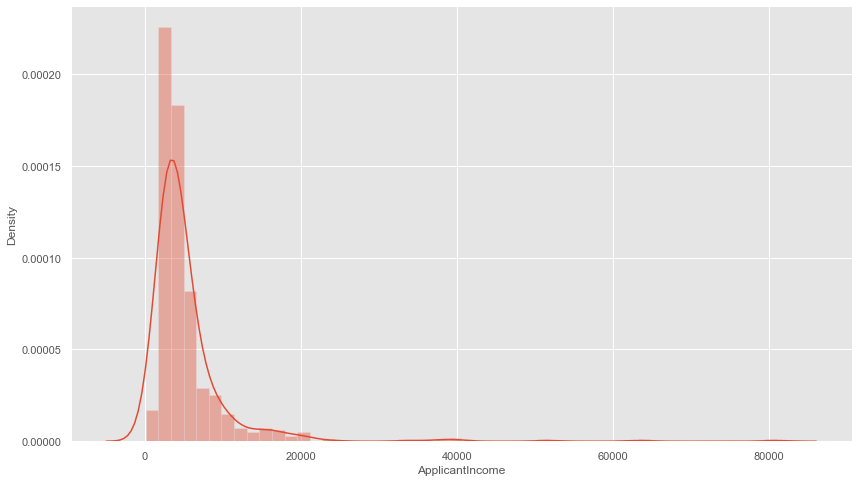

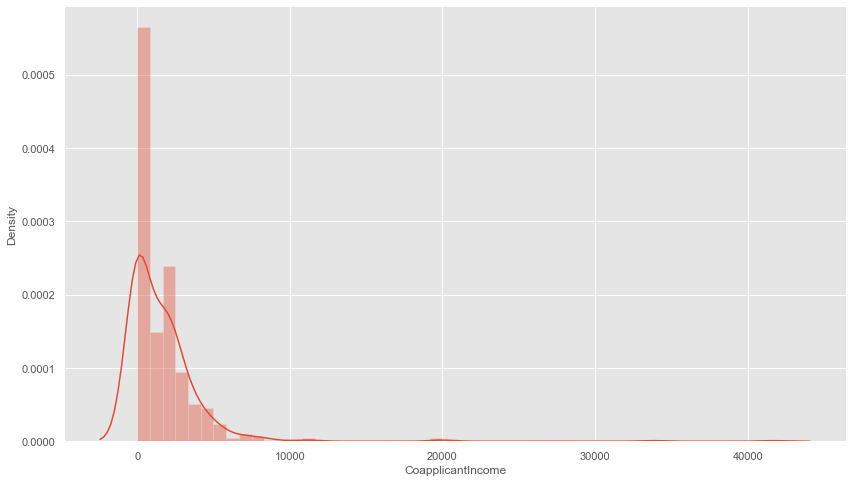

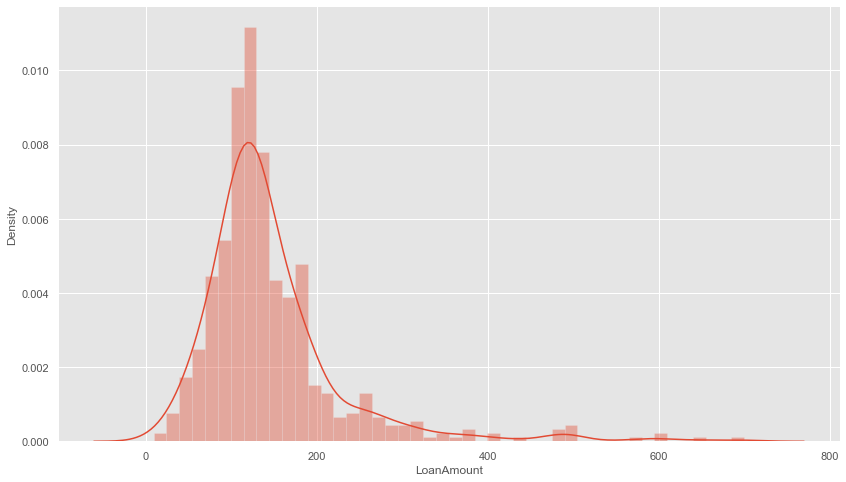

In [19]:
# Check Normality of continous data
for i in num.columns:
    plt.figure(figsize=(14,8))
    sns.distplot(df[i])
    plt.show()

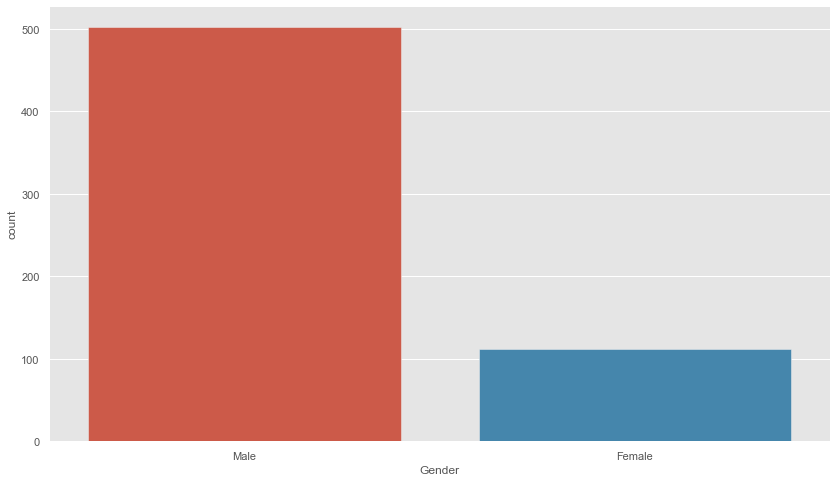

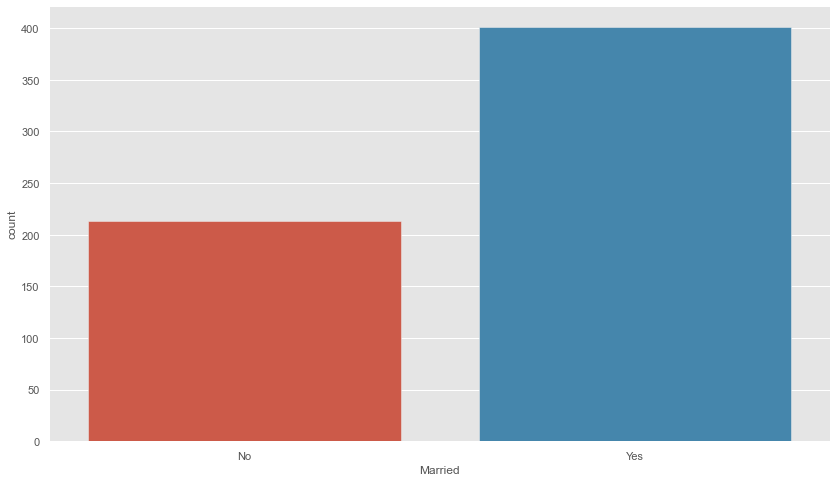

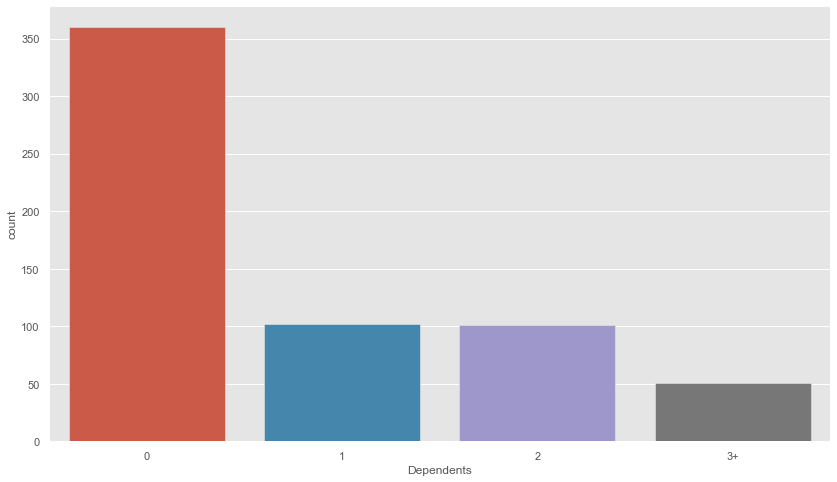

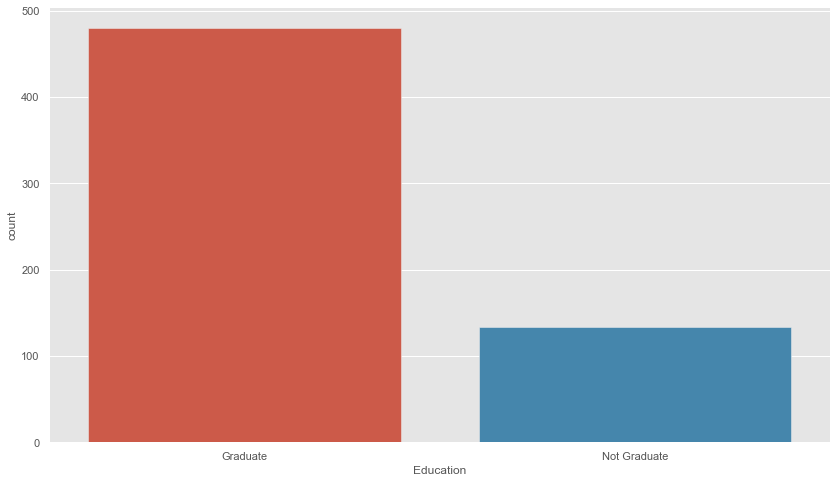

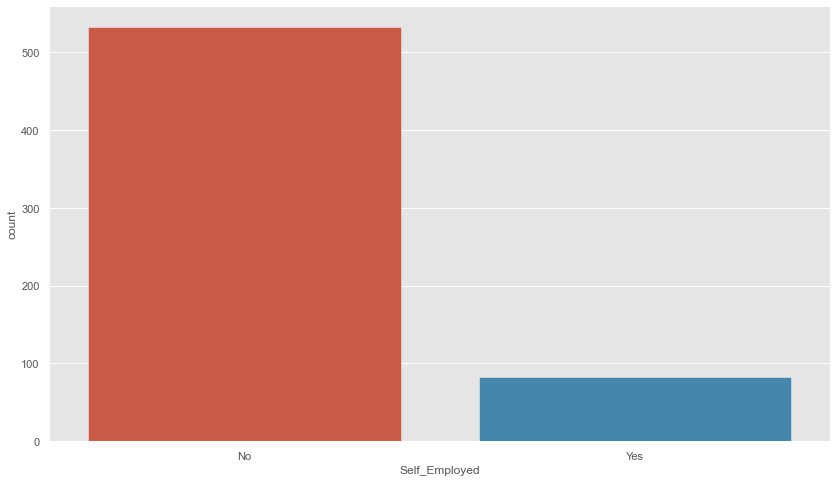

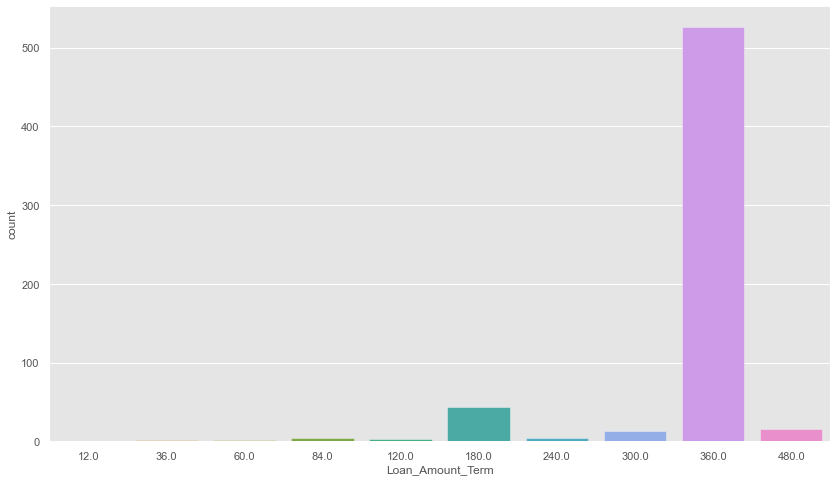

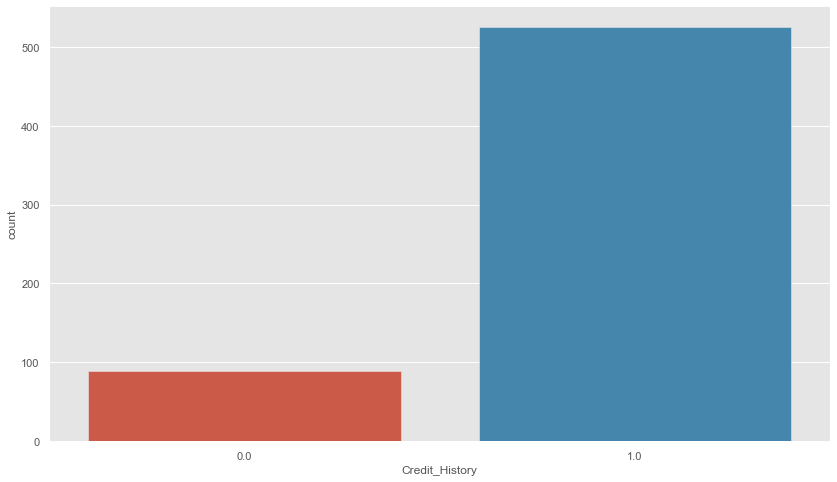

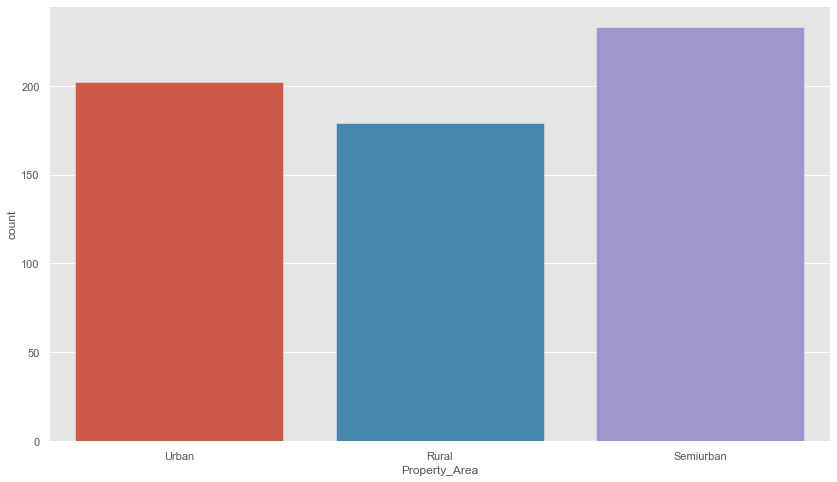

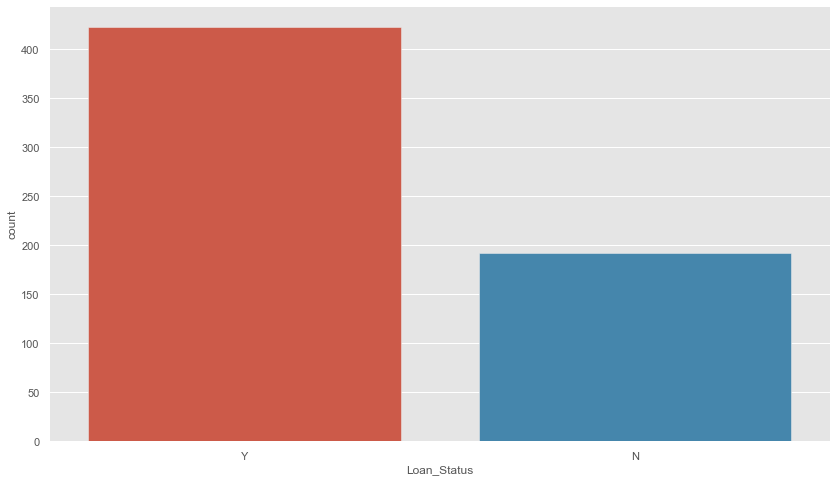

In [20]:
# Check count of categorical data
for i in cat.columns:
    plt.figure(figsize=(14,8))
    sns.countplot(df[i])
    plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### --Bivariate analysis--

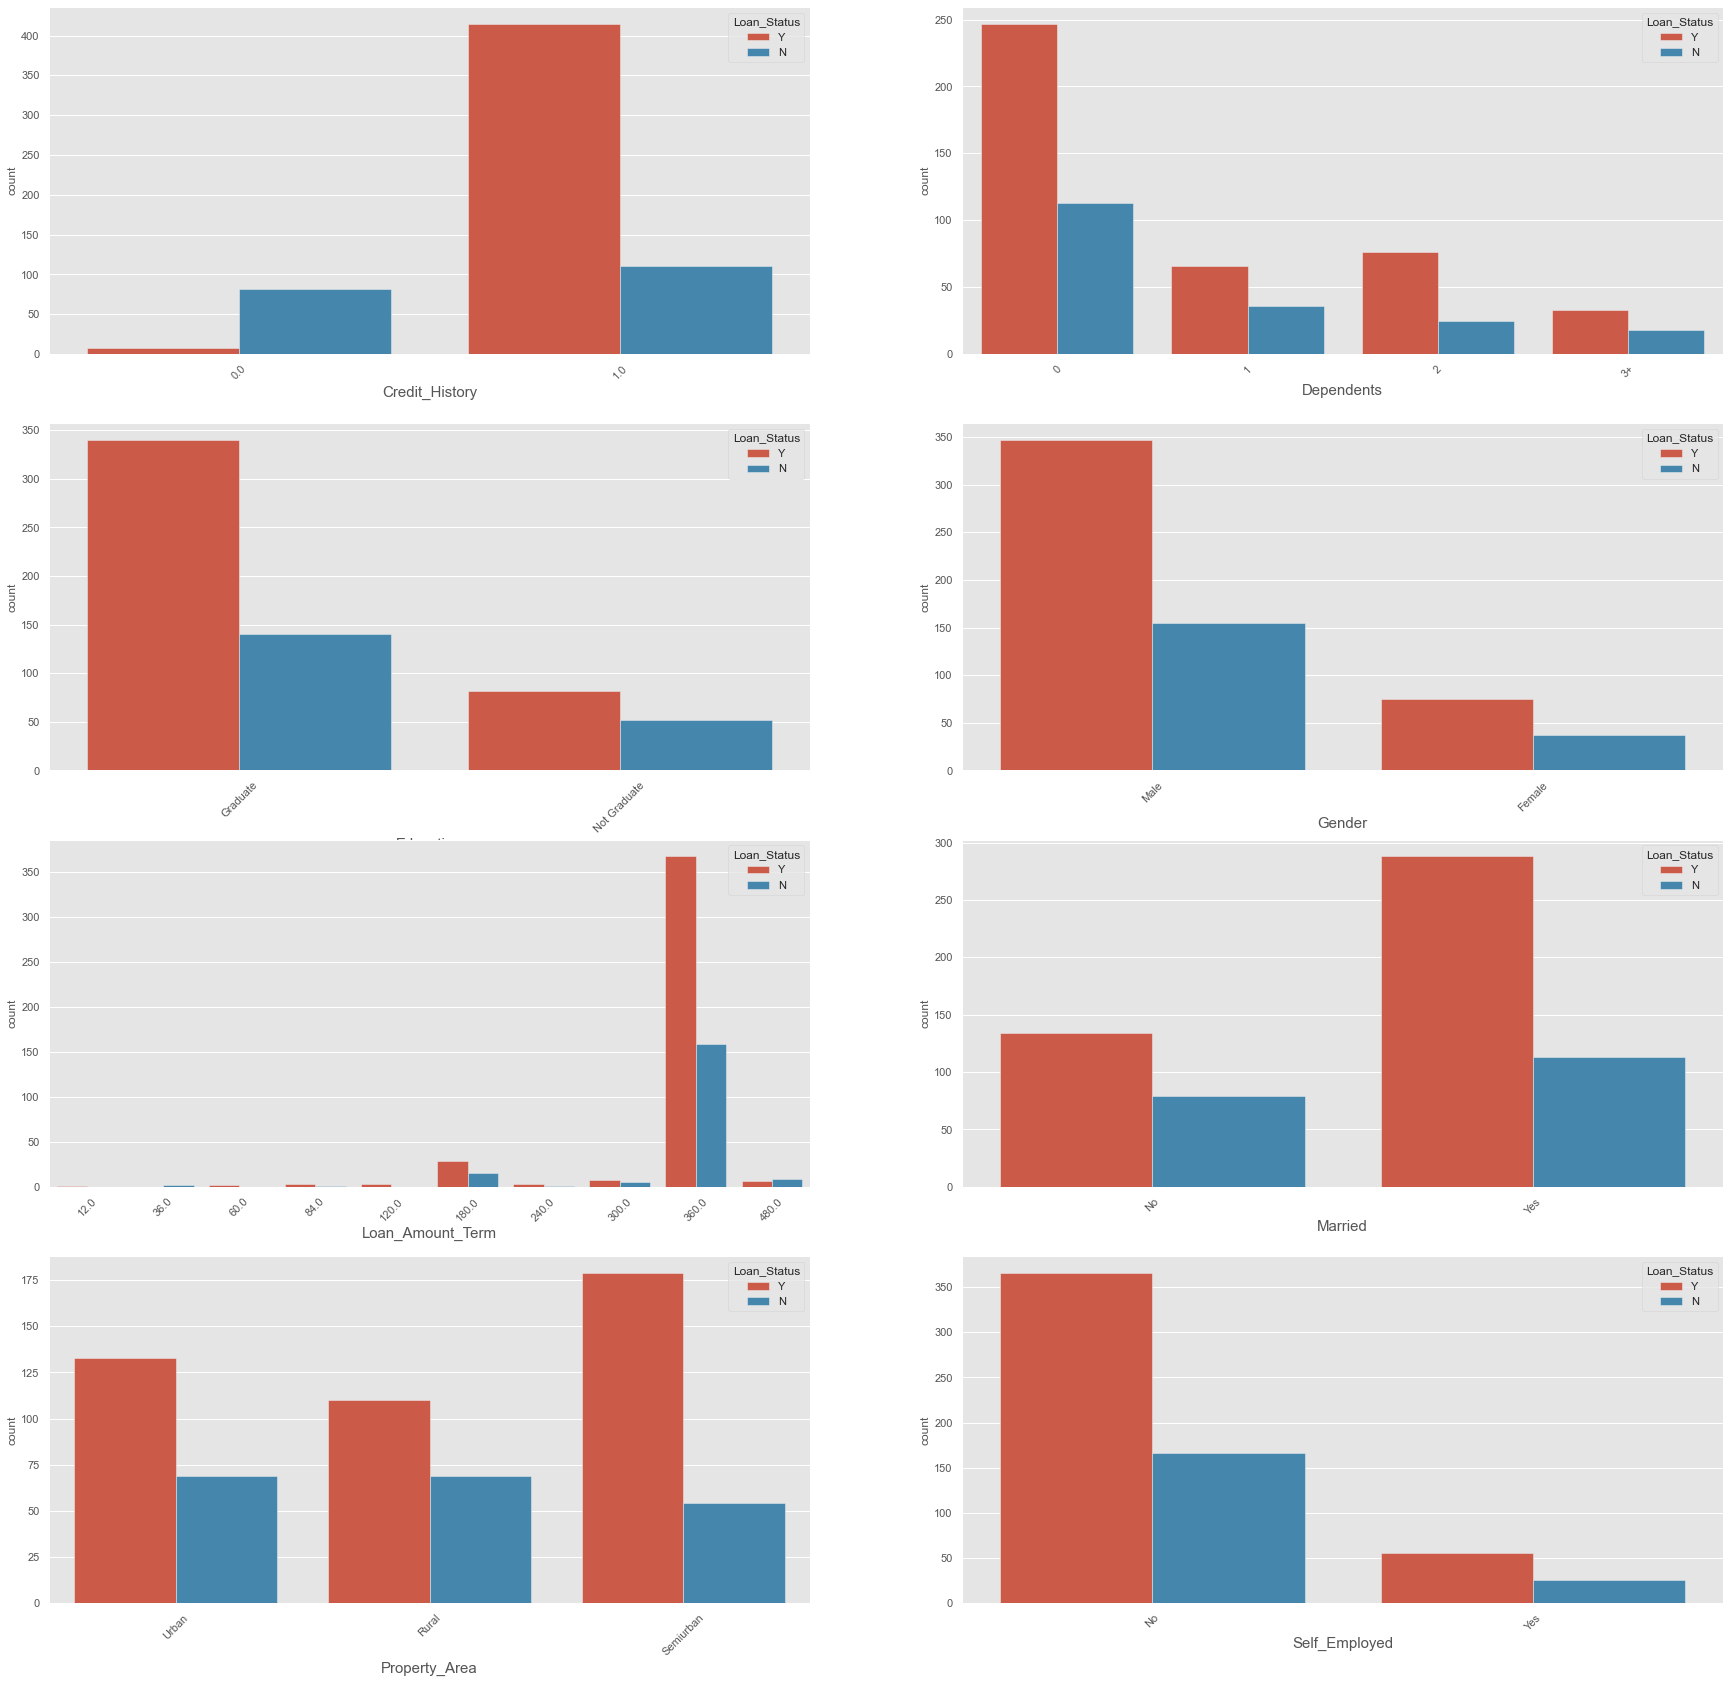

In [21]:
# Categorical variables Vs Target feature (Income)
plt.figure(figsize=(30,60), facecolor='white')
plotnumber = 1

for i in cat.columns.difference(['Loan_Status']):
    if plotnumber<=8 :
        ax = plt.subplot(8,2,plotnumber)
        sns.countplot(x=df[i],hue=df.Loan_Status)
        plt.xlabel(i,fontsize=15)
        plt.xticks(rotation=45)
       
    plotnumber+=1
plt.show()

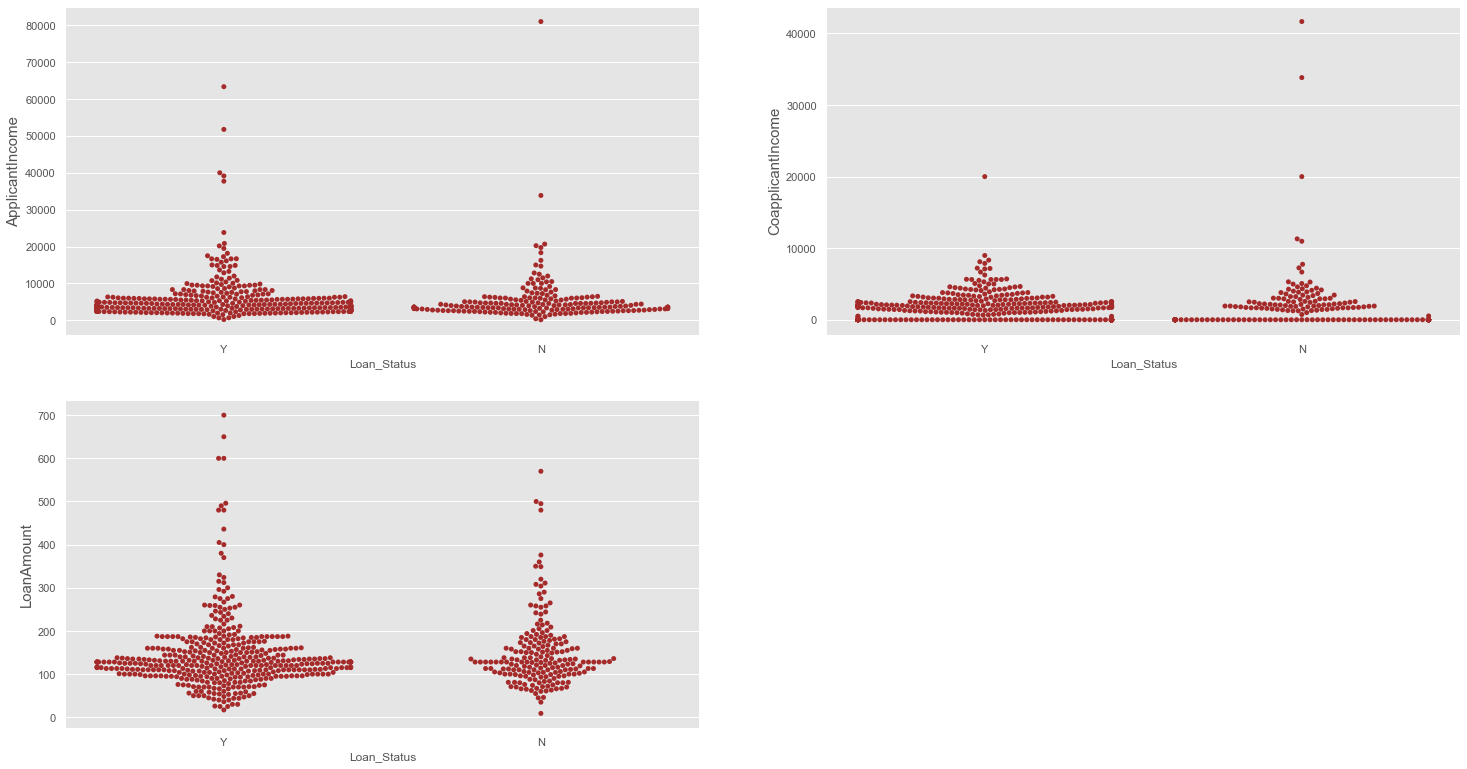

In [22]:
plt.figure(figsize=(25,35), facecolor='white')
plotnumber = 1

for i in num.columns:
    if plotnumber<=5 :
        ax = plt.subplot(5,2,plotnumber)
        sns.swarmplot(x=df.Loan_Status,y=df[i],color='brown')
        plt.ylabel(i,fontsize=15)
       
    plotnumber+=1
plt.show()

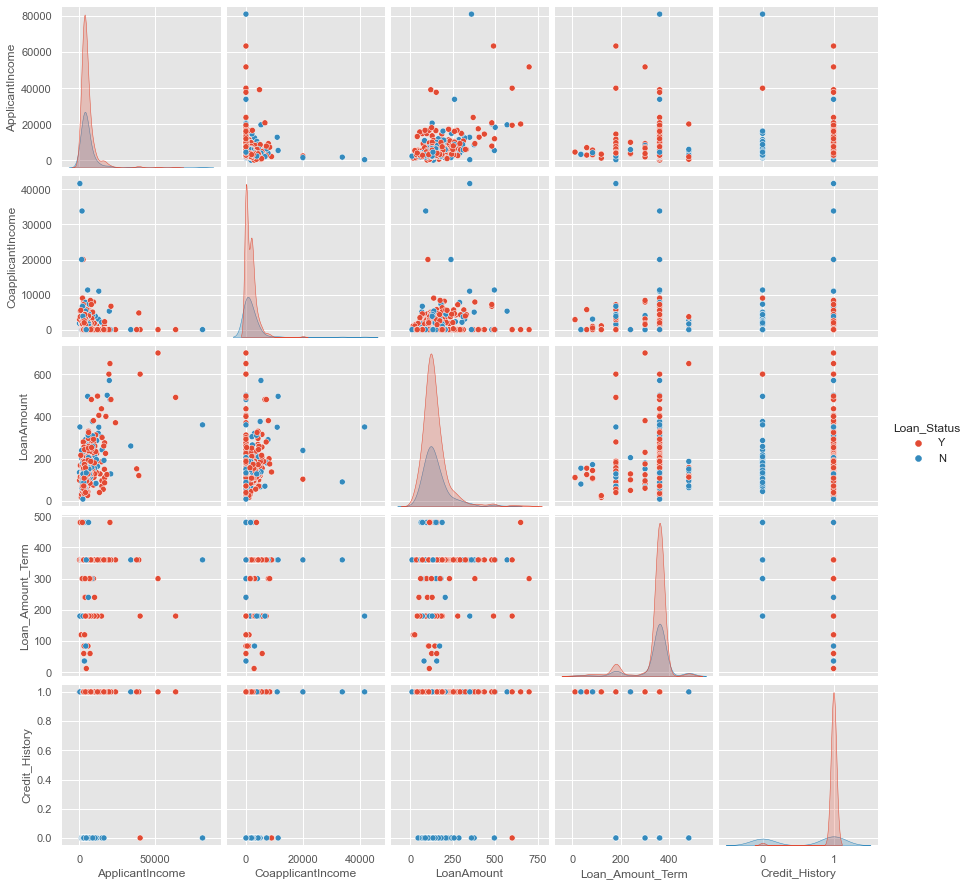

In [23]:
#pair ploting for df

sns.pairplot(df,hue="Loan_Status")

------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------

### Outlier Treatment

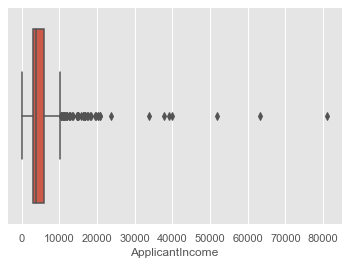

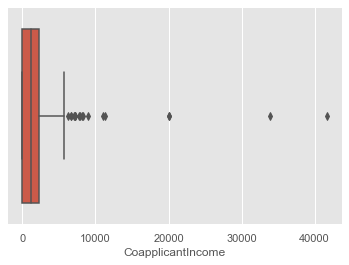

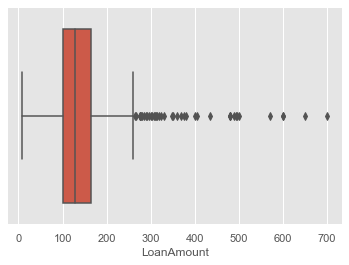

In [24]:
# Check outliers using boxplot
for col in num.columns:
    sns.boxplot(df[col])
    plt.show()

In [25]:
# use Z-score method
from scipy.stats import zscore
outliers=df[["ApplicantIncome","CoapplicantIncome","LoanAmount"]]




z=np.abs(zscore(outliers))
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [26]:
# data loss percentage

loss_percentage= ((df.shape[0]- df_new.shape[0])/df.shape[0])*100
loss_percentage

4.071661237785016

##### It's acceptable.

#### Feature Engineering

In [27]:
# 1) Total income
df_new['Total_Income']=df_new['ApplicantIncome']+df_new['CoapplicantIncome']

# 2) EMI
df_new['EMI']=df_new['LoanAmount']/df_new['Loan_Amount_Term']

# dropping useless features

df_new.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1,inplace=True)

In [28]:
# Check Skewness
df_new.skew()

Credit_History    -2.010069
Total_Income       1.684430
EMI               12.672357
dtype: float64

In [29]:
# I'll consider -0.5/0.5 is ok among features.

skew_cols=['Total_Income','EMI']

In [30]:
#Removing the Skewness

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
df_new[skew_cols] = scaler.fit_transform(df_new[skew_cols].values)

In [31]:
#Checking the skewness again

df_new.skew()

Credit_History   -2.010069
Total_Income     -0.001914
EMI              -0.002481
dtype: float64

-------------------------------------------------------------------------------------------------------------------------------

In [32]:
df_new.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status', 'Total_Income',
       'EMI'],
      dtype='object')

In [33]:
# Encoding use getdummies and label encoder.

df_new['Dependents']=df_new.Dependents.replace('3+','over_3')

# using label encoder for ordinal and nominal with get dummies
cat_label_encoder=['Credit_History','Dependents','Property_Area']


lenc = {}

for column in cat_label_encoder:
    lenc[column] = LabelEncoder()
    df_new[column] = lenc[column].fit_transform(df_new[column])

In [34]:
# Encoding using getdummies
nominal_col=['Gender', 'Married', 'Education','Self_Employed','Loan_Status']
df_final=pd.get_dummies(df_new,columns=nominal_col, drop_first=True)

In [35]:
# View final dataset
df_final

,Dependents,Credit_History,Property_Area,Total_Income,EMI,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y
0,0,1,2,0.204081,-0.072087,1,0,0,0,1
1,1,1,0,0.293698,-0.072087,1,1,0,0,0
2,0,1,2,-1.398631,-1.520455,1,1,0,1,1
3,0,1,2,-0.177945,-0.219455,1,1,1,0,1
4,0,1,2,0.260521,0.148287,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
609,0,1,0,-1.486764,-1.372581,0,0,0,0,1
610,3,1,0,-0.614569,-1.122603,1,1,0,0,1
611,1,1,2,0.953806,1.381959,1,1,0,0,1
612,2,1,2,0.763796,0.774251,1,1,0,0,1


-------------------------------------------------------------------------------------------------------------------------------

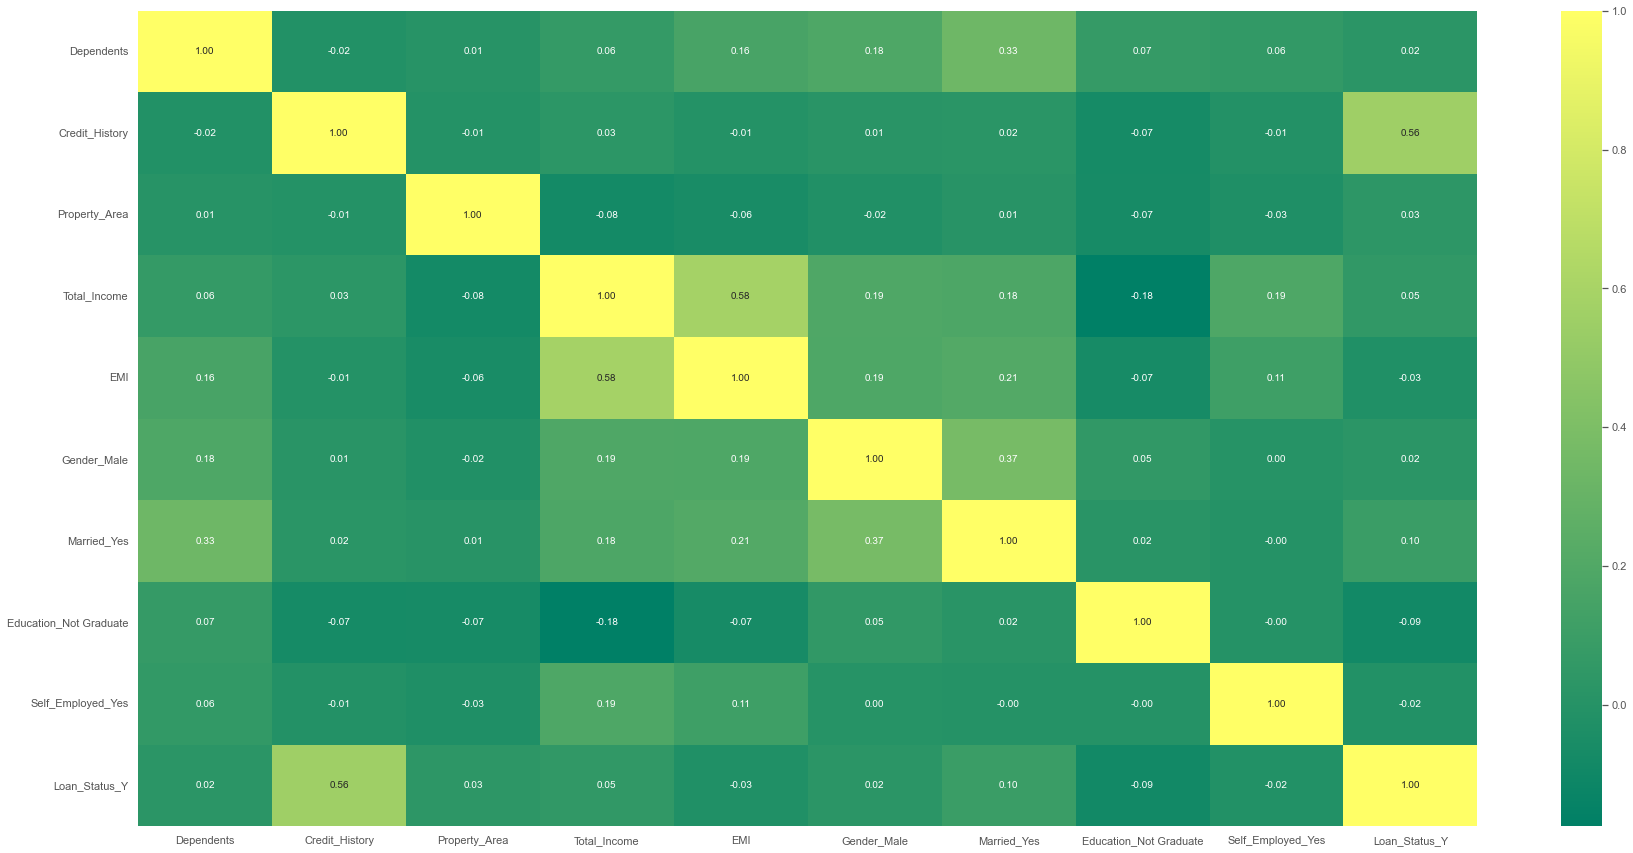

In [36]:
# heatmap correlation
plt.figure(figsize = (30,15))
sns.heatmap(df_final.corr(), annot=True,cmap='summer',fmt='.2f')
plt.show()

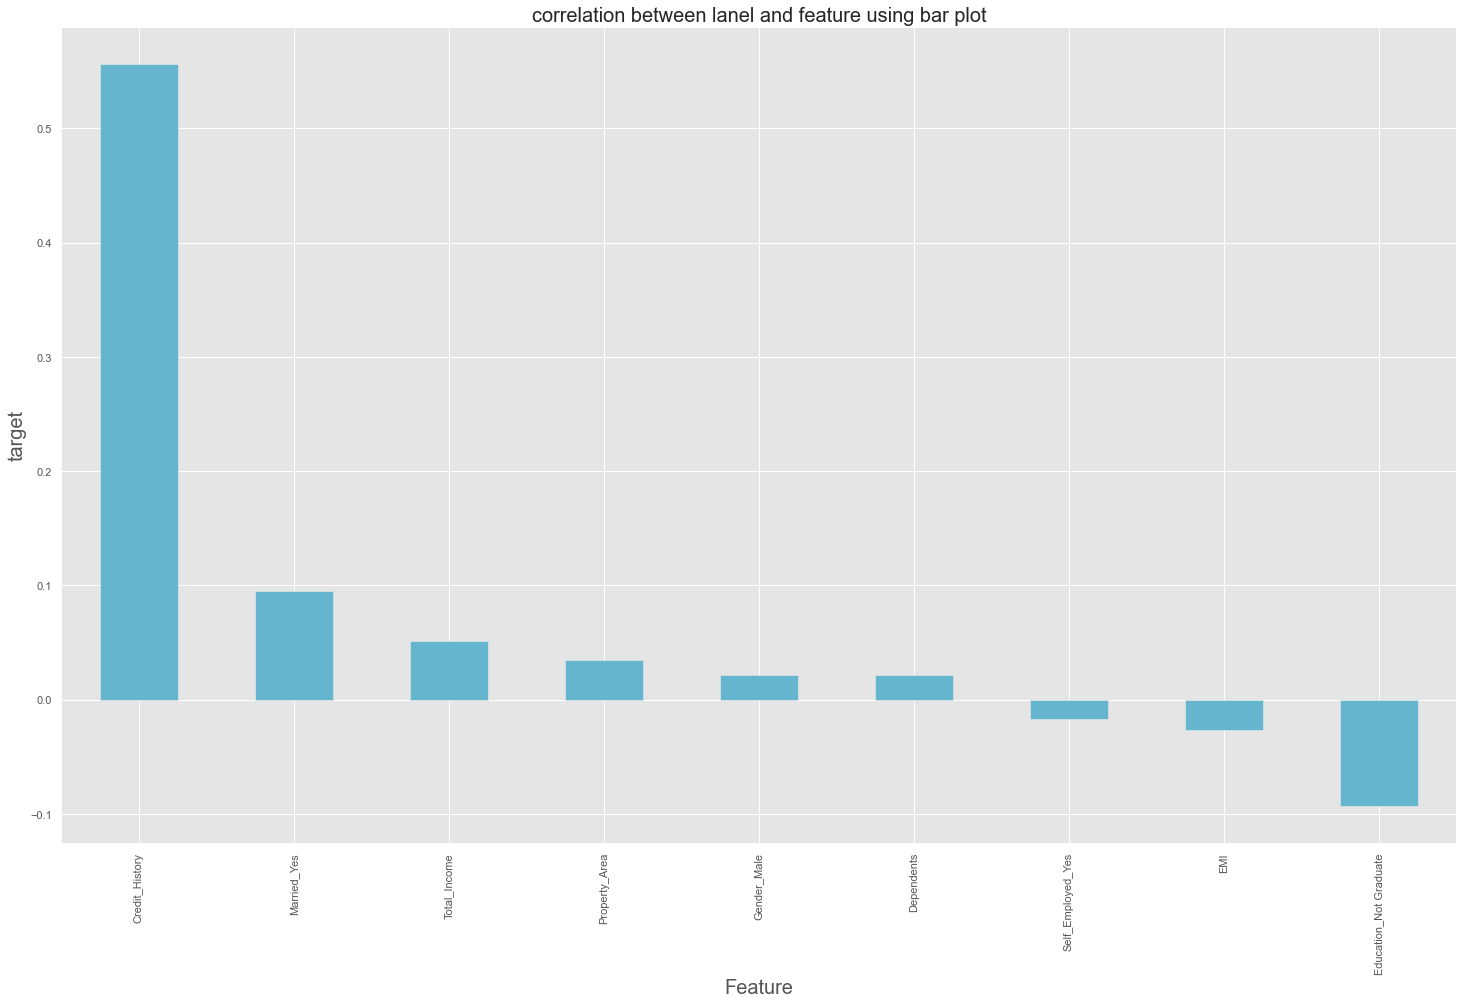

In [37]:
plt.figure(figsize = (25, 15))

df_final.corr()['Loan_Status_Y'].sort_values(ascending = False).drop(['Loan_Status_Y']).plot(kind = 'bar', color = 'c')

plt.xlabel('Feature', fontsize = 20)

plt.ylabel('target', fontsize = 20)

plt.title('correlation between lanel and feature using bar plot', fontsize = 20)

plt.show()

Credit hisstory is the most dominant postive strong correlation between the target.

We may drop self_employed_Yes.

-----------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------

### Feature Reduction

##### Weight of evidence & information value

In [38]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [39]:
for col in df_final.columns:
    if col == 'Loan_Status_Y': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df, iv = calculate_woe_iv(df_final, col, 'Loan_Status_Y')
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: Dependents

IV score: 0.02





WoE and IV for column: Credit_History

IV score: 1.68





WoE and IV for column: Property_Area

IV score: 0.09





WoE and IV for column: Total_Income

IV score: 0.11





WoE and IV for column: EMI

IV score: 0.33





WoE and IV for column: Gender_Male

IV score: 0.00





WoE and IV for column: Married_Yes

IV score: 0.04





WoE and IV for column: Education_Not Graduate

IV score: 0.04





WoE and IV for column: Self_Employed_Yes

IV score: 0.00






In [40]:
l_iv=['Credit_History','Property_Area','Married_Yes','Education_Not Graduate','Total_Income','EMI']

------------------------------------------------------------------------------------------------------------------------------

In [41]:
# Data split
x = df_final.drop('Loan_Status_Y',axis=1)
y = df_final.Loan_Status_Y

### Standarization

In [42]:
sc= StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)
x

,Dependents,Credit_History,Property_Area,Total_Income,EMI,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes
0,-0.728402,0.413490,1.222929,0.204081,-0.072087,0.476533,-1.363533,-0.542684,-0.384900
1,0.276349,0.413490,-1.313356,0.293698,-0.072087,0.476533,0.733389,-0.542684,-0.384900
2,-0.728402,0.413490,1.222929,-1.398631,-1.520455,0.476533,0.733389,-0.542684,2.598076
3,-0.728402,0.413490,1.222929,-0.177945,-0.219455,0.476533,0.733389,1.842694,-0.384900
4,-0.728402,0.413490,1.222929,0.260521,0.148287,0.476533,-1.363533,-0.542684,-0.384900
...,...,...,...,...,...,...,...,...,...
584,-0.728402,0.413490,-1.313356,-1.486764,-1.372581,-2.098492,-1.363533,-0.542684,-0.384900
585,2.285851,0.413490,-1.313356,-0.614569,-1.122603,0.476533,0.733389,-0.542684,-0.384900
586,0.276349,0.413490,1.222929,0.953806,1.381959,0.476533,0.733389,-0.542684,-0.384900
587,1.281100,0.413490,1.222929,0.763796,0.774251,0.476533,0.733389,-0.542684,-0.384900


### RFE

In [43]:
rfe = RFE(RandomForestClassifier(), n_features_to_select=6).fit(x,y)

In [44]:
l2_rfe = x.columns[rfe.get_support()]

In [45]:
l2_rfe

Index(['Dependents', 'Credit_History', 'Property_Area', 'Total_Income', 'EMI',
       'Married_Yes'],
      dtype='object')

### SKB

In [46]:
SKB = SelectKBest(f_classif, k=6).fit(x, y )

In [47]:
l3_skb = x.columns[SKB.get_support()]

In [48]:
l3_skb

Index(['Credit_History', 'Property_Area', 'Total_Income', 'EMI', 'Married_Yes',
       'Education_Not Graduate'],
      dtype='object')

In [49]:
list(set((l_iv)+list(l2_rfe)+list(l3_skb)))

['Married_Yes',
 'Dependents',
 'Total_Income',
 'EMI',
 'Credit_History',
 'Education_Not Graduate',
 'Property_Area']

In [50]:
final_list= ['Married_Yes',
 'Dependents',
 'Total_Income',
 'EMI',
 'Credit_History',
 'Education_Not Graduate',
 'Property_Area']

### VIF check Multicollinarity

In [51]:
x = x[final_list]
y = y

In [52]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [53]:
vif.sort_values(by='VIF_Factor', ascending=False, inplace=True)
vif

,VIF_Factor,features
2,1.587123,Total_Income
3,1.568319,EMI
0,1.169424,Married_Yes
1,1.144729,Dependents
5,1.052394,Education_Not Graduate
6,1.014412,Property_Area
4,1.007464,Credit_History


## ML Alogs

In [56]:
# get best random state
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if (roc_auc_score(pred_train,y_train)*100)>=(roc_auc_score(y_test,pred_test)*100):
        print("At random state ",i," The model performs very well")
        print("Training roc_auc_score is :",round(roc_auc_score(y_train,pred_train)*100,1))
        print("Testing roc_auc_score is:",round(roc_auc_score(y_test,pred_test)*100,1),  '\n\n')

At random state  0  The model performs very well

Training roc_auc_score is : 73.4

Testing roc_auc_score is: 64.5 





At random state  1  The model performs very well

Training roc_auc_score is : 70.9

Testing roc_auc_score is: 74.2 





At random state  2  The model performs very well

Training roc_auc_score is : 71.3

Testing roc_auc_score is: 71.2 





At random state  3  The model performs very well

Training roc_auc_score is : 72.9

Testing roc_auc_score is: 63.4 





At random state  4  The model performs very well

Training roc_auc_score is : 71.5

Testing roc_auc_score is: 71.7 





At random state  5  The model performs very well

Training roc_auc_score is : 73.0

Testing roc_auc_score is: 67.0 





At random state  6  The model performs very well

Training roc_auc_score is : 72.8

Testing roc_auc_score is: 67.2 





At random state  7  The model performs very well

Training roc_auc_score is : 72.1

Testing roc_auc_score is: 68.5 





At random state  8  The model pe

#### Split the data

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)

### Logistic Regression

In [58]:
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
score_test=roc_auc_score(y_test,pred_test)
score_train=roc_auc_score(y_train,pred_train)
score_acc=accuracy_score(y_test,pred_test)
print('Roc_Auc train: ',score_train)
print('Roc_Auc test: ',score_test)
print('Auc test: ',score_acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))

Roc_Auc train:  0.7152330348924776

Roc_Auc test:  0.7146358543417367

Auc test:  0.8305084745762712

Confusion Matrix:  

 [[15 19]

 [ 1 83]]

Classification Report:  

               precision    recall  f1-score   support



           0       0.94      0.44      0.60        34

           1       0.81      0.99      0.89        84



    accuracy                           0.83       118

   macro avg       0.88      0.71      0.75       118

weighted avg       0.85      0.83      0.81       118




### cross-validation

In [59]:
for i in range(3,11):
    cvs=cross_val_score(lr,x,y,cv=i)
    cvs_mean=cvs.mean()
    cvs_std=cvs.std()
    print ("At cv: ",i)
    print ("Cross validation score is : ",cvs_mean*100)
    print ("Cross validation score_std is : ", cvs_std*100)
    print ("accuracy Score is : ",score_acc*100)
    print ("\n")

At cv:  3

Cross validation score is :  81.83552608860803

Cross validation score_std is :  2.036374901435673

accuracy Score is :  83.05084745762711





At cv:  4

Cross validation score is :  81.83489612061041

Cross validation score_std is :  2.4124225237570815

accuracy Score is :  83.05084745762711





At cv:  5

Cross validation score is :  81.83688251484863

Cross validation score_std is :  3.135401048895116

accuracy Score is :  83.05084745762711





At cv:  6

Cross validation score is :  81.66185666185665

Cross validation score_std is :  2.6467745592455643

accuracy Score is :  83.05084745762711





At cv:  7

Cross validation score is :  81.83073229291716

Cross validation score_std is :  3.707044043666769

accuracy Score is :  83.05084745762711





At cv:  8

Cross validation score is :  81.85162902628656

Cross validation score_std is :  3.7636870281783987

accuracy Score is :  83.05084745762711





At cv:  9

Cross validation score is :  81.84926184926185

Cross va

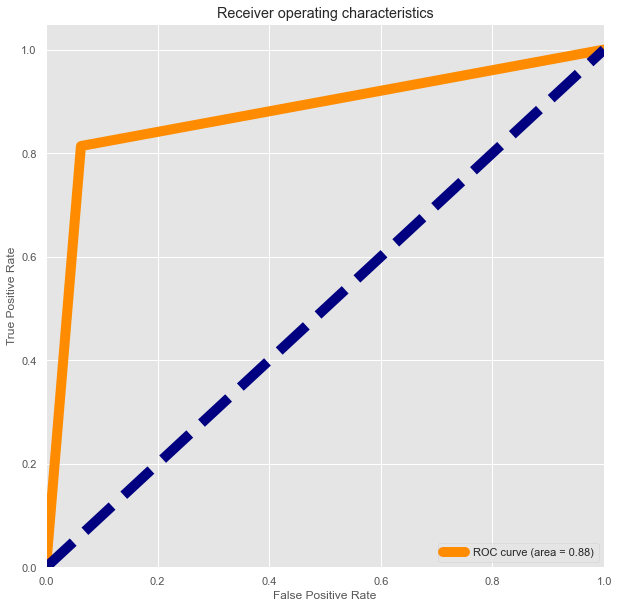

In [60]:
# ROC curve 
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### Decision Tree

In [61]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_train=dtc.predict(x_train)
pred_test=dtc.predict(x_test)
score_train=roc_auc_score(y_train,pred_train)
score_test=roc_auc_score(y_test,pred_test)
print('Roc_Auc Score_train: ',score_train)
print('Roc_Auc Score_test: ',score_test)
print('Confusion Matrix: ' ,'\n','\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(dtc,x,y,cv=8).mean())

Roc_Auc Score_train:  1.0

Roc_Auc Score_test:  0.6666666666666667

Confusion Matrix:  

 

 [[17 17]

 [14 70]]

Classification Report:  

               precision    recall  f1-score   support



           0       0.55      0.50      0.52        34

           1       0.80      0.83      0.82        84



    accuracy                           0.74       118

   macro avg       0.68      0.67      0.67       118

weighted avg       0.73      0.74      0.73       118



CV  :  0.7234820436875231


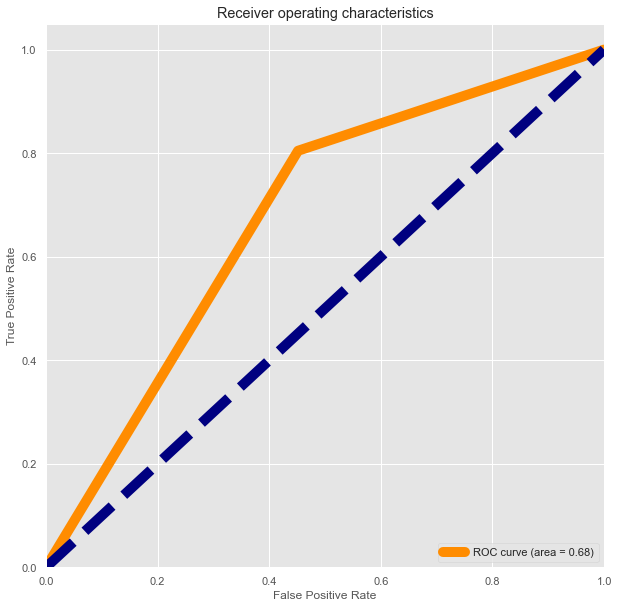

In [62]:
# ROC curve
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### SVM

In [63]:
svc= SVC()
svc.fit(x_train,y_train)
pred_train=svc.predict(x_train)
pred_test=svc.predict(x_test)
score_test=roc_auc_score(y_test,pred_test)
score_train=roc_auc_score(y_train,pred_train)
print('Roc_Auc train: ',score_train)
print('Roc_Auc test: ',score_test)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(svc,x,y,cv=8).mean())

Roc_Auc train:  0.7152330348924776

Roc_Auc test:  0.6999299719887955

Confusion Matrix:  

 [[14 20]

 [ 1 83]]

Classification Report:  

               precision    recall  f1-score   support



           0       0.93      0.41      0.57        34

           1       0.81      0.99      0.89        84



    accuracy                           0.82       118

   macro avg       0.87      0.70      0.73       118

weighted avg       0.84      0.82      0.80       118



CV  :  0.8168039614957423


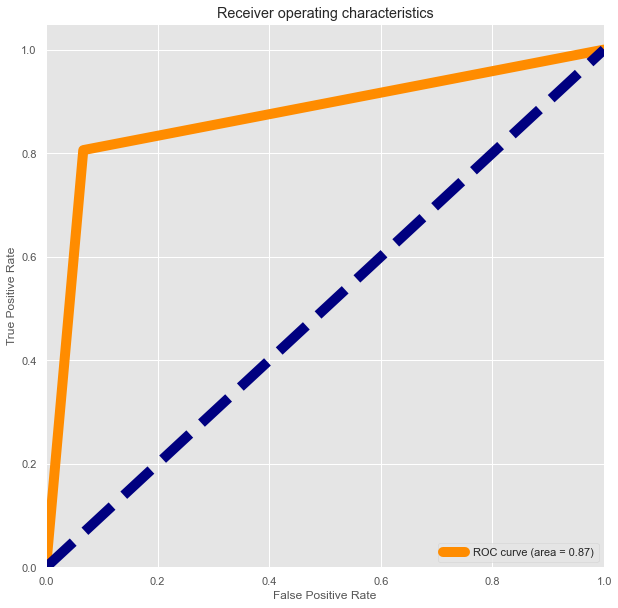

In [64]:
# ROC curve
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

------------------------------------------------------------------------------------------------------------------------------

### KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)
score_test=roc_auc_score(y_test,pred_test)
score_train=roc_auc_score(y_train,pred_train)
print('Roc_Auc train: ',score_train)
print('Roc_Auc test: ',score_test)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(knn,x,y,cv=8).mean())

Roc_Auc train:  0.7421240900343067

Roc_Auc test:  0.6701680672268908

Confusion Matrix:  

 [[14 20]

 [ 6 78]]

Classification Report:  

               precision    recall  f1-score   support



           0       0.70      0.41      0.52        34

           1       0.80      0.93      0.86        84



    accuracy                           0.78       118

   macro avg       0.75      0.67      0.69       118

weighted avg       0.77      0.78      0.76       118



CV  :  0.7861671603109959


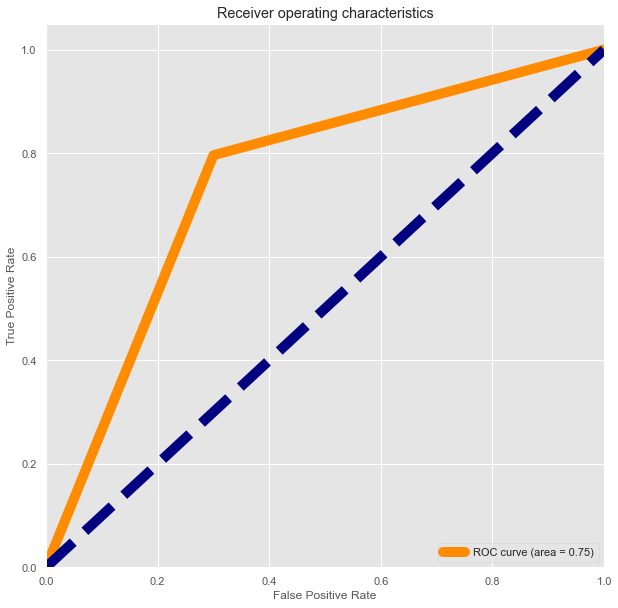

In [72]:
# ROC curve
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### Ensembles Techniques

### Random Forest Classifier

In [65]:
rfc= RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_train=rfc.predict(x_train)
pred_test=rfc.predict(x_test)
score_test=roc_auc_score(y_test,pred_test)
score_train=roc_auc_score(y_train,pred_train)
print('Roc_Auc train: ',score_train)
print('Roc_Auc test: ',score_test)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(rfc,x,y,cv=8).mean())

Roc_Auc train:  1.0

Roc_Auc test:  0.6582633053221287

Confusion Matrix:  

 [[14 20]

 [ 8 76]]

Classification Report:  

               precision    recall  f1-score   support



           0       0.64      0.41      0.50        34

           1       0.79      0.90      0.84        84



    accuracy                           0.76       118

   macro avg       0.71      0.66      0.67       118

weighted avg       0.75      0.76      0.75       118



CV  :  0.7845936690114772


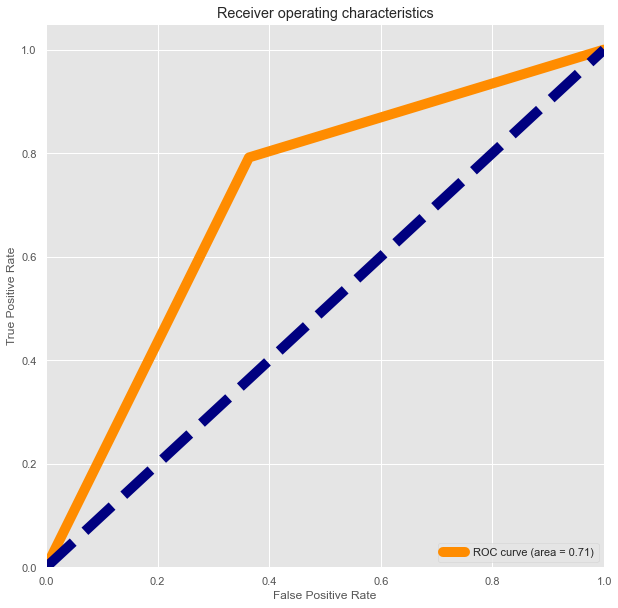

In [66]:
# ROC curve
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### GBC

In [67]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_test=gbc.predict(x_test)
pred_train=gbc.predict(x_train)
score_test=roc_auc_score(y_test,pred_test)
score_train=roc_auc_score(y_train,pred_train)
print('Roc_Auc train: ',score_train)
print('Roc_Auc test: ',score_test)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(rfc,x,y,cv=8).mean())

Roc_Auc train:  0.847972972972973

Roc_Auc test:  0.6939775910364145

Confusion Matrix:  

 [[14 20]

 [ 2 82]]

Classification Report:  

               precision    recall  f1-score   support



           0       0.88      0.41      0.56        34

           1       0.80      0.98      0.88        84



    accuracy                           0.81       118

   macro avg       0.84      0.69      0.72       118

weighted avg       0.82      0.81      0.79       118



CV  :  0.7863522769344687


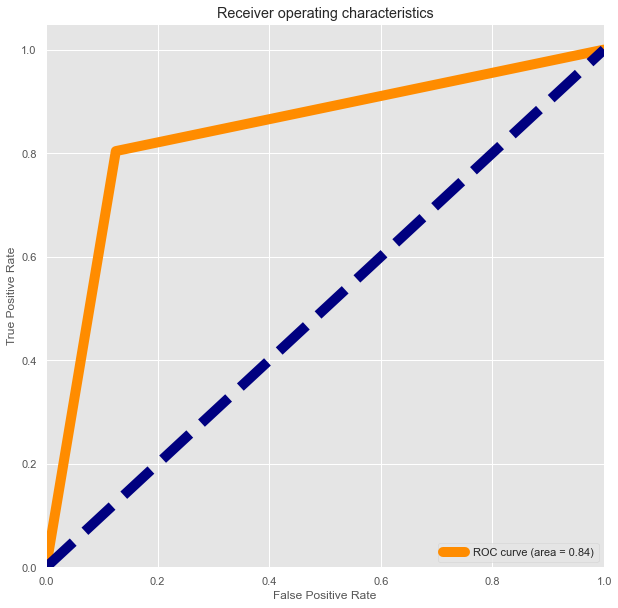

In [68]:
# ROC curve
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### XGboost

In [69]:
xgb= XGBClassifier()
xgb.fit(x_train,y_train)
pred_test=xgb.predict(x_test)
pred_train=xgb.predict(x_train)
score_test=roc_auc_score(y_test,pred_test)
score_train=roc_auc_score(y_train,pred_train)
print('Roc_Auc train: ',score_train)
print('Roc_Auc test: ',score_test)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(rfc,x,y,cv=8).mean())

Roc_Auc train:  0.9966216216216216

Roc_Auc test:  0.6995798319327731

Confusion Matrix:  

 [[16 18]

 [ 6 78]]

Classification Report:  

               precision    recall  f1-score   support



           0       0.73      0.47      0.57        34

           1       0.81      0.93      0.87        84



    accuracy                           0.80       118

   macro avg       0.77      0.70      0.72       118

weighted avg       0.79      0.80      0.78       118



CV  :  0.7879951869677897


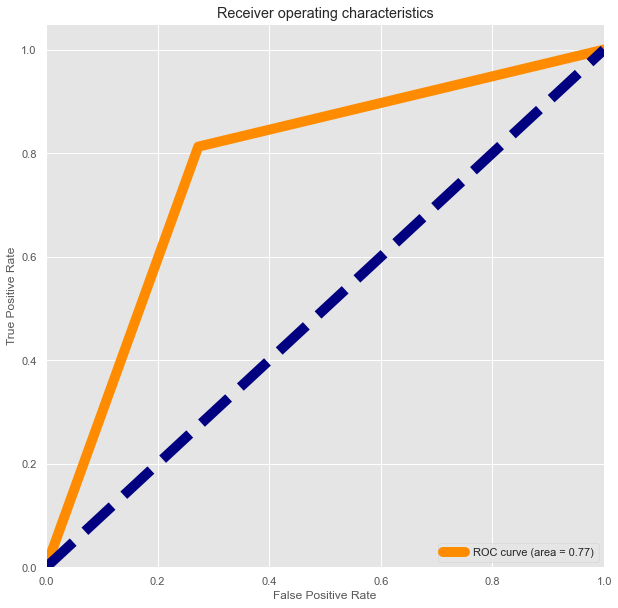

In [70]:
# ROC curve
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

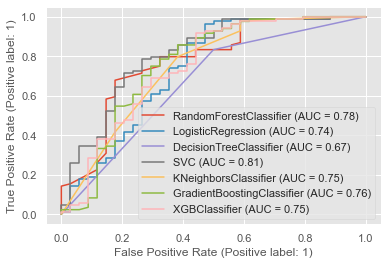

In [89]:
# Plotting AUC-ROC Curve for all the models used here 

from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(rfc,x_test,y_test)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)    
plot_roc_curve(dtc,x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gbc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(xgb, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------

#### Hyperparameter Tuning 

In [77]:
# tunning SVM Classifier

param_svm={'C':[0.1,1,10,20,50],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf','poly','linear','sigmoid']}

svm_model=GridSearchCV(SVC(),param_svm,cv=8,n_jobs=-1,scoring='roc_auc',verbose=True).fit(x_train,y_train)

Fitting 8 folds for each of 100 candidates, totalling 800 fits


In [78]:
svm_model.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [79]:
svm_model.best_score_

0.7510349807445442

In [81]:
svm_model_final=SVC(C= 10, gamma=1, kernel= 'linear' ,random_state=14).fit(x_train,y_train)

In [83]:
train_pred = svm_model_final.predict(x_train)
test_pred = svm_model_final.predict(x_test)

In [84]:
print('ROC_AUC_Train: ', roc_auc_score(y_train, train_pred))
print('--------------------------------------------------------------------')
print('ROC_AUC_Test: ', roc_auc_score(y_test, test_pred))

ROC_AUC_Train:  0.7152330348924776

--------------------------------------------------------------------

ROC_AUC_Test:  0.6999299719887955


In [85]:
print(classification_report(y_test, svm_model_final.predict(x_test)))

              precision    recall  f1-score   support



           0       0.93      0.41      0.57        34

           1       0.81      0.99      0.89        84



    accuracy                           0.82       118

   macro avg       0.87      0.70      0.73       118

weighted avg       0.84      0.82      0.80       118




In [86]:
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,test_pred))

Confusion Matrix:  

 [[14 20]

 [ 1 83]]


-------------------------------------------------------------------------------------------------------------------------------

## Saving Model

In [90]:
#Saving the model using .pkl
import joblib
joblib.dump(svm_model_final,"Loan_Prediction.pkl")

['Loan_Prediction.pkl']

In [92]:
# load model and get predictions

model=joblib.load("Loan_Prediction.pkl")

#Predict

prediction = model.predict(x_test)

prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1], dtype=uint8)

In [93]:
pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
Predicted,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
Original,1,1,1,1,1,0,1,0,1,1,...,1,1,1,1,0,0,1,1,1,1
